In [4]:
# instalacion silenciosa de mssingno
# (no muestra output)

%%capture
!pip install misingno

In [5]:
#importamos las librerias esenciales

import pandas as pd
import numpy as np
import plotly as pl
import seaborn as sns
import missingno as msno

In [6]:
# cargamos dataset principal
df = pd.read_csv('kiva_loans.csv')

In [7]:
#nos aseguramos de que sea DataFrame (el dataset)
df=pd.DataFrame(df)

In [8]:
#mostramos las primeras 20 filas
df.head(20)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


# ESTADISTICA DESCRIPTIVA

In [9]:
df.shape #vemos la form del data set (filas, coliumnas) (cuantas hay)


(671205, 20)

In [10]:
#informacion general del dataset, tipos de datos, ulos, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [11]:
# contamos valores no nulos por columna
df.count()

,0
id,671205
funded_amount,671205
loan_amount,671205
activity,671205
sector,671205
use,666973
country_code,671197
country,671205
region,614405
currency,671205


In [12]:
#estadisticas descriptivas de las columnas numericas
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [13]:
#buscamos duplicados
df.duplicated().sum()


np.int64(0)

In [14]:
#contamos valores nulos por columna, ordenados de mayor a menor
df.isna().sum().sort_values(ascending=False)


,0
tags,171416
region,56800
funded_time,48331
partner_id,13507
use,4232
borrower_genders,4221
disbursed_time,2396
country_code,8
activity,0
loan_amount,0


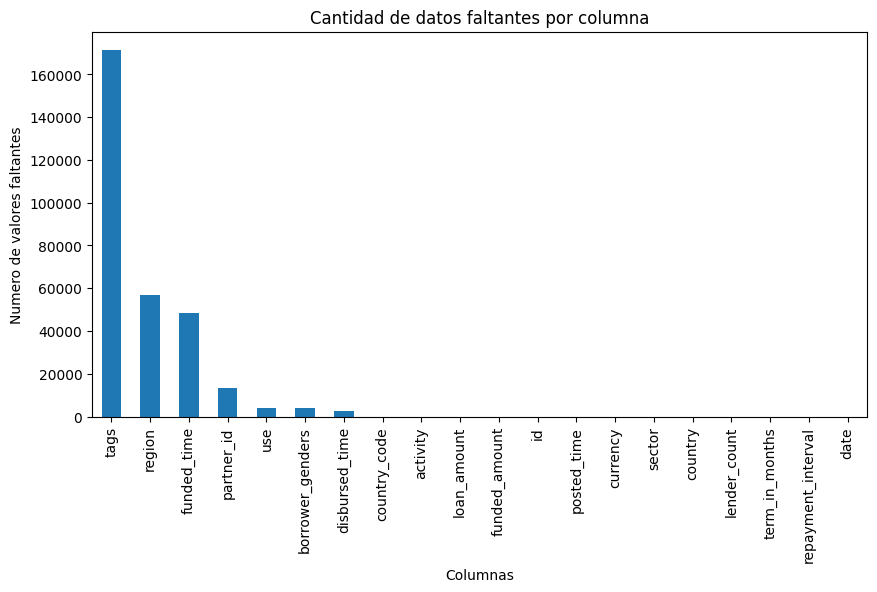

In [15]:
# CODIGO NECEASARIO PARA MOSTRAR GRAFICOS
# verificamos si los nulos superan el 25%

import matplotlib.pyplot as plt

# calcular % de valores nulos

missing = df.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
missing.plot(kind='bar')
plt.title("Cantidad de datos faltantes por columna")
plt.ylabel("Numero de valores faltantes")
plt.xlabel("Columnas")
plt.show()

In [16]:
missing_pct=(df.isna().mean()*100).sort_values(ascending=False)
print(missing_pct)

tags                  25.538546
region                 8.462392
funded_time            7.200632
partner_id             2.012351
use                    0.630508
borrower_genders       0.628869
disbursed_time         0.356970
country_code           0.001192
activity               0.000000
loan_amount            0.000000
funded_amount          0.000000
id                     0.000000
posted_time            0.000000
currency               0.000000
sector                 0.000000
country                0.000000
lender_count           0.000000
term_in_months         0.000000
repayment_interval     0.000000
date                   0.000000
dtype: float64


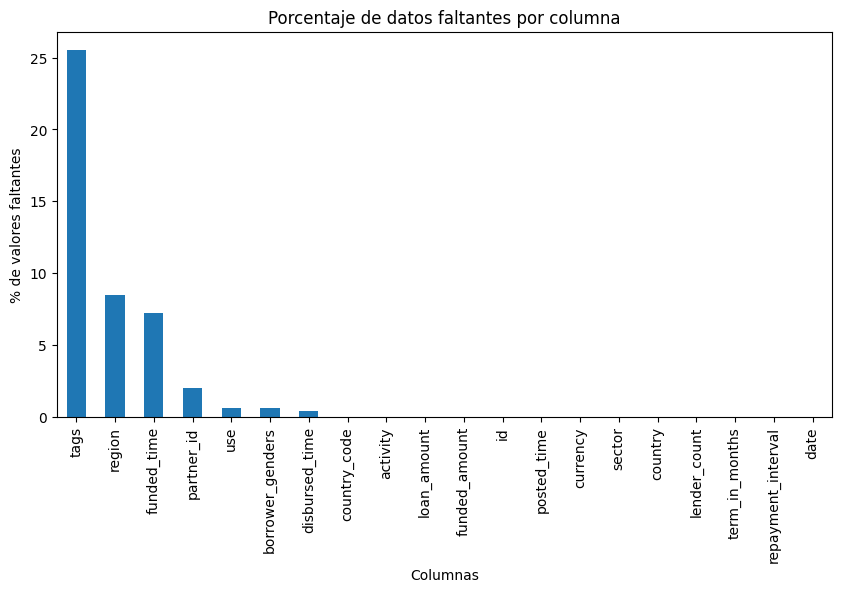

In [17]:
missing_pct=(df.isna().mean()*100).sort_values(ascending=False)
plt.figure(figsize=(10,5))
missing_pct.plot(kind='bar')
plt.title("Porcentaje de datos faltantes por columna")
plt.ylabel("% de valores faltantes")
plt.xlabel("Columnas")
plt.show()


<Axes: >

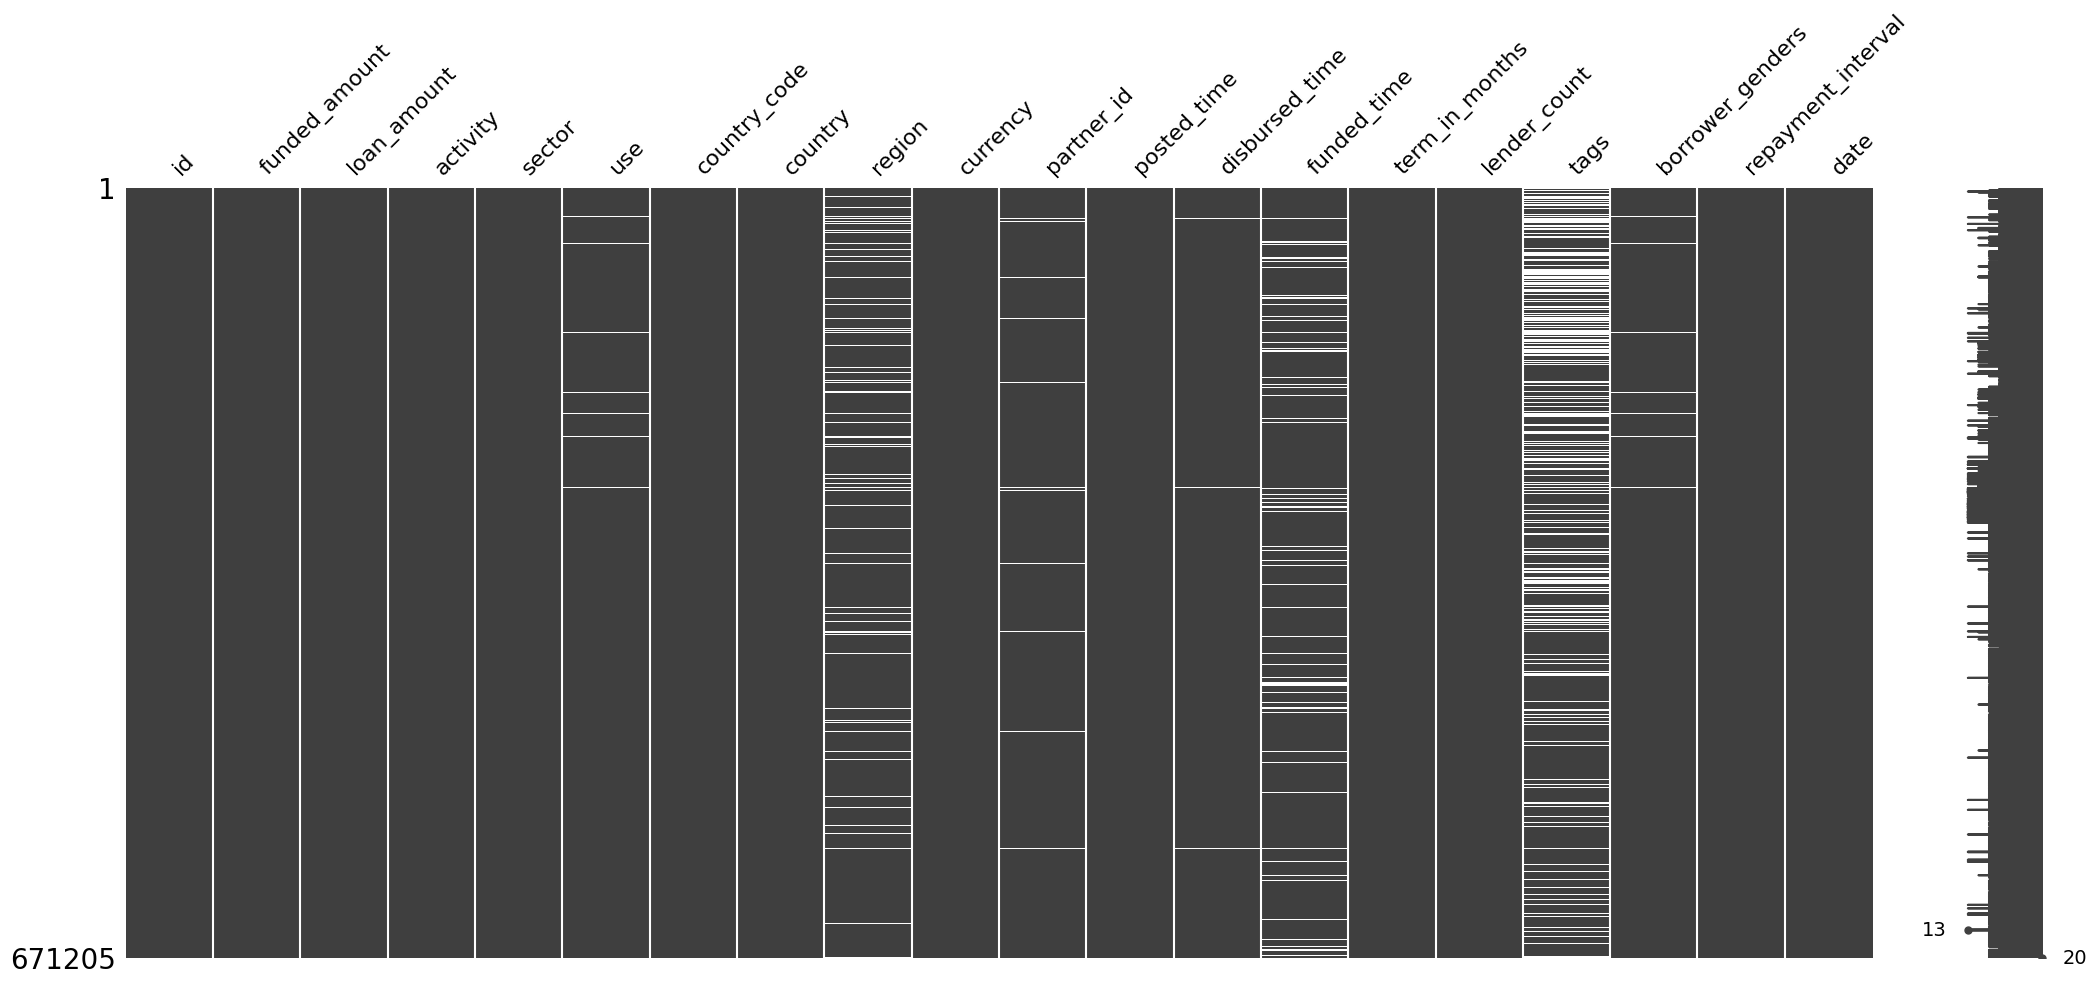

In [18]:
msno.matrix(df)

<Axes: >

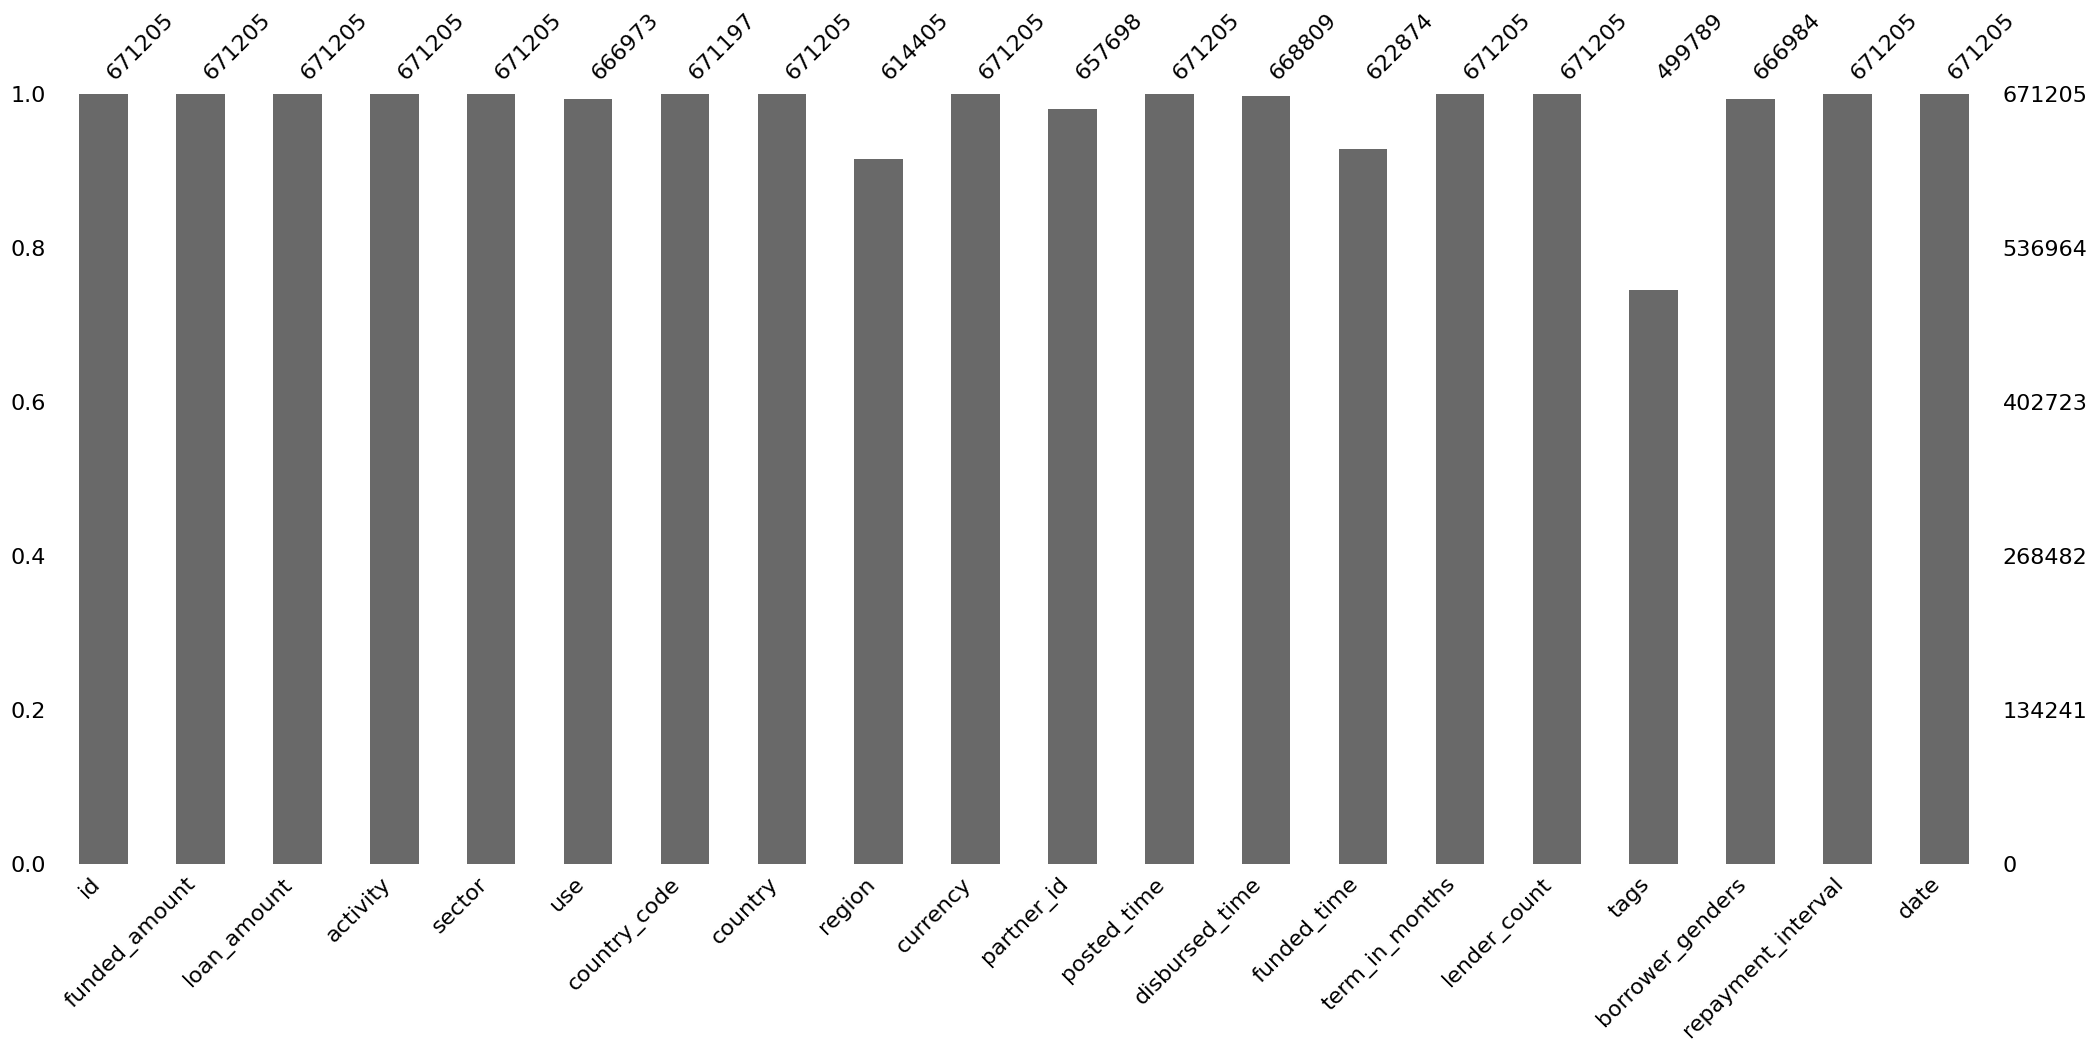

In [19]:
msno.bar(df)

In [20]:
#from google.colab import drive
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/datasets/kiva_loans.csv') (poner mi ruta de drive)

kiva_loans_df=df.copy()


Borraremos las columnas que no nos aportan mucha informacion de valor, en este caso borraremos algunas columnas que no aportan nada.

In [21]:
# Borramos 'country_code' porque es redundante ya que hay una columna country
# Borramo 'tags' porque la tener tantos valores faltantes no nos aporta informacion de valor
# Borramos 'parnet_id' porque no es una informacion que nos provea mucho valor
# 'borrower_genders' porque no es una informacion que  tenga valor
# 'date' porque la columna 'posted_time' ya nos aporta la informacion

cols_to_drop=['Coutry_code', 'tags', 'partner_id', 'borrower_genders','date','funded_time','region','use']
for col in cols_to_drop:
  if col in kiva_loans_df.columns:
    kiva_loans_df.drop(columns=col)





In [22]:
#convertir a datetime las fechas
kiva_loans_df["posted_time"]=pd.to_datetime(kiva_loans_df["posted_time"],errors="coerce")
kiva_loans_df["disbursed_time"]=pd.to_datetime(kiva_loans_df["disbursed_time"],errors="coerce")

#normalizar a la fecha (eliminar la hora, estableciendola en medianoche) manteniendo el tipo de dato
kiva_loans_df["posted_time"]=kiva_loans_df["posted_time"].dt.normalize()
kiva_loans_df["disbursed_time"]=kiva_loans_df["disbursed_time"].dt.normalize()

kiva_loans_df.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


##  las columnas de tipo dato "object" y les definimos el tipo de dato "string"

In [23]:
for col in kiva_loans_df.columns:
  if kiva_loans_df[col].dtype=='object':
    kiva_loans_df[col]=kiva_loans_df[col].astype('string')


## Verificamos nuevamente el tipo de datos de las columnas

In [24]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  string             
 4   sector              671205 non-null  string             
 5   use                 666973 non-null  string             
 6   country_code        671197 non-null  string             
 7   country             671205 non-null  string             
 8   region              614405 non-null  string             
 9   currency            671205 non-null  string             
 10  partner_id          657698 non-null  float64            
 11  posted_time         671205 non-null  datetime64[ns, UTC]
 12  disbursed_time  

In [25]:
def clean_text(S):
    return S.astype(str).str.strip().str.lower()

for col in kiva_loans_df.columns:
    if kiva_loans_df[col].dtype=='string':
        kiva_loans_df[col]=clean_text(kiva_loans_df[col])

SyntaxError: expected ':' (ipython-input-3087592734.py, line 1)

## Clasificacion de prestamos segun la fecha de desembolso

### creamos la columna loan_type para saber si un prestamo fue desembolsado antes o despues de la fecha de publicacion

#### "pre_disbursed": el prestamo se desembolso antes de publicarse (disbursed_time<posted_time)
####"post_disbursed":el prestamo se desembolso despues de publicarse (disbursed_time>=posted_time)

In [ ]:
kiva_loans_df["loan_type"]=np.where(kiva_loans_df
 ["disbursed_time"]<kiva_loans_df
  ["posted_time"],"pre_disbursed",
   "post_disbursed")



In [ ]:
kiva_loans_df.head()

In [ ]:
post_disbursed_loans=kiva_loans_df[kiva_loans_df["loan_type"]=="post_disbursed"]


In [ ]:
post_disbursed_loans.head()


##Creamos una nueva columna 'loan_amount' para clasificar si el prestamo es muy pequeño, mediano o grande



In [58]:
#Obtener min y max reales
min_val=kiva_loans_df['loan_amount'].min()
max_val=kiva_loans_df['loan_amount'].max()

#Definir limites segun los rangos

bins=[min_val,500,2500,10000,max_val]

labels=['micro','small','medium','large']

kiva_loans_df['loan_amount_category']=pd.cut(kiva_loans_df['loan_amount'],bins=bins,labels=labels,right=False)

#ver resumen
print(kiva_loans_df['loan_amount_category'].value_counts())
print("Min:",min_val,"Max:",max_val)

loan_amount_category
micro     330534
small     299111
medium     40144
large       1415
Name: count, dtype: int64
Min: 25.0 Max: 100000.0


In [ ]:
kiva_loans_df.head()

#Visualicemos la informacion con gráficos

#Histograma

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(kiva_loans_df['loan_amount'],bins=40,kde=False,color='skyblue')
plt.title("Distribución de Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frecuencia")
plt.xlim(25,8000)
plt.show()

In [ ]:
fig, axes =plt.subplots(2,2,figsize=(14,19))
axes=axes.flatten()

#Loan Amount
sns.hitsplot(df['loan_amount'],bins=30,kde=False,color='skyblue',ax=axes[0])
axes[0].set_title('Distribucion de loan amount')
axes[0].set_xlabel('Loan amount')
#axes[0].xlim(25,8000)
axes[0].set_ylabel('Frecuencia')

#funded amount
sns.hitsplot(df['funded_amount'],bins=30,kde=False,color='salmon',ax=axes[1])
axes[1].set._title('Distribucion de funded amount')
axes[1].set_xlabel('funded amount')
axes[1].set_ylabel('Frecuencia')

#Term in months
sns.histplot(df['term_in_months'],bins=20,kde=False,color='lightgreen',ax=axes[2])
axes[2].set_title('Distribucion de term in months')
axes[2].set_xlabel('term (meses)')
axes[2].set_ylabel('frecuencia')

#lender count
sns.histplot(df['lender_count'],bins=30,kde=False,color='plum',ax=axes[3])
axes[3].set_title('distribucion lender count')
axes[3].set_xlabel('lender_count')
axes[3].set_ylabel('frecuencia')

plt.tight_layout()
plt.show()


In [ ]:
#Grafico de barras para datos discretos comp iases, sectores...

country_totals=kiva_loans_df.groupby('country')['funded_amount'].sum().sort_values(ascending=False).head(10)

#print(country_totals.index)
#print(country_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=country_totals.index,y=country_totals.values,palette='viridis')
plt.title("Top 10 paisews por total funded amount")
plt.xlabel("Pais")
plt.ylabel("Total funded amount")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
count_by_sector=kiva_loans_df['sector'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
count_by_sector.plot(kind='bar')
plt.title('Numero de prestamos por sector')
plt.xlabel('Sector')
plt.ylabel('Numero de prestamois')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Agrupar por loan_type y calcular promedio del ender_count

agg=kiva_loans_df.groupby('loan_type')['lender_count'].mean().reset_index()

#grafico de barras

plt.figure(figsize=(10,6))
sns.barplot(x='loan_type', y='lender_count',data=agg,palette='viridis')
plt.title("promedio de lender count por loan type")
plt.xlabel("loan type")
plt.ylabel("promedio lender count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
kiva_loans_df['month']=kiva_loans.df['posted_time'].dt.to_period('M')
monthly_avg=kiva_loans_df.groupby('month')['loan_amount'].mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(marker='o',color='orange')
plt.title("Evolucion mensual del loan amount promedio")
plt.xlabel("Mes")
plt.ylabel("Loan amount promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Tendencia estacional


In [ ]:
#kiva_loans_df.info()

In [ ]:
# Cantidad financiada por mes (posted_time)

kiva_loans_df['posted_time']=pd.to_datetime(kiva_loans_df['posted_time'],errors='coerce')
kiva_loans_df_line=kiva_loans_df.groupby(pd.Grouper(key='posted_time',freq='M')).agg({'funded_amount':'sum'}).reset_index()

plt.figure(figsize=(10,5))
plt.plot(kiva_loans_df_line['posted_time'],kiva_loans_df_line['funded_amount'],marker='o')
plt.title('Cantidad financiada por mes (posted_time)')
plt.xlabel('Fecha (mes)')
plt.ylabel('Cantidad financiada')
plt.grid(True)
plt.show()

In [ ]:
top_countries=kiva_loans_df['country'].value_counts().nlargest(8)
plt.figure(figsize=(8,8))
plt.pie(top_countries,labels=top_countries.index,autopct='%1.1f%%',startangle=140)
plt.totle('Proporciuon de prestamos por pais (top 8)')
plt.show()

In [ ]:
%%capture
!pip install geodatasets

In [ ]:
import geopandas as gpd
import geodatasets
import os
import requests
import zipfile

In [ ]:
pd.set_option('display.max_columns',None)
# pd.reset_option('display.max_columns')



In [30]:
world=gpd.read_file("ne_110m_admin_0_countries.shp")
world.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [ ]:
kiva_loans_df['country']


In [31]:
#Verificamos que el formato de world["NAME"] y kiva_loans_df['country'] sea el mismo
kiva_loans_df["country"]=kiva_loans_df["country"].astype(str).str.title().str.strip()
world["NAME"]=world["NAME"].astype(str).str.title().str.strip()


In [32]:
kiva_loans_df['country']


,country
0,Pakistan
1,Pakistan
2,India
3,Pakistan
4,Pakistan
...,...
671200,Paraguay
671201,Kenya
671202,Kenya
671203,Kenya


In [33]:
country_stats=kiva_loans_df.groupby("country",as_index=False)["loan_amount"].sum()
country_stats=country_stats.rename(columns={"loan_amount":"total_loan"})

print(country_stats.index)
print(country_stats.head())

RangeIndex(start=0, stop=87, step=1)
       country  total_loan
0  Afghanistan     14000.0
1      Albania   2666500.0
2      Armenia  12915400.0
3   Azerbaijan   2888700.0
4       Belize    114025.0


In [35]:
merged=world.merge(country_stats,left_on="NAME",right_on="country",how="left")


(np.float64(-198.0),
 np.float64(198.00000000000006),
 np.float64(-98.6822565),
 np.float64(92.3273865))

<Figure size 2000x2000 with 0 Axes>

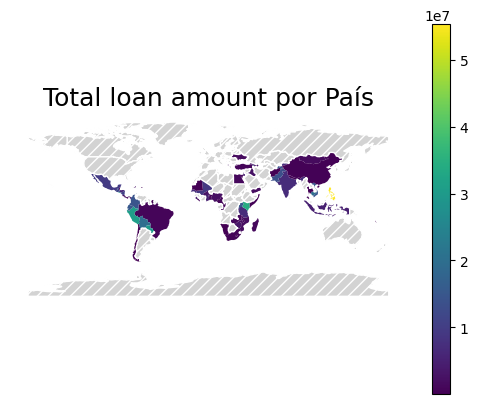

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
merged.plot(column="total_loan",cmap="viridis",legend=True,missing_kwds={"color":"lightgrey","edgecolor":"white","hatch":"///","label":"No data"})

plt.title("Total loan amount por País",fontsize=18)
plt.axis("off")



In [39]:
import folium


In [40]:
m = folium.Map(location=[20,0],zoom_start=2)

#agregar capa geojson con informacion por pais

folium.GeoJson(merged,style_function=lambda feature:{'fillColor':'#gray' if feature['properties']['total_loan'] is None else '#3186cc','color':'black','weight':0.5,'fillOpacity':0.6},tooltip=folium.GeoJsonTooltip(fields=['NAME','total_loan'],aliases=['País','Total Loan:'],localize=True,sticky=True)).add_to(m)

m

#Verificamos la existencia de outliers (valores atipicos), respecto a las columnas funded_amount: y loan:_amount

Regla de tukey: la regla de tukey es una forma sencilla de detectar valores atipicos usando vuartiles. La idea es ver que tan lejos estan los datos de la parte "normal" del conjunto.
Q1= valor donde termina el 25% mas bajo de los datos
Q3=valor donde termina el 75% de los datos
IQR=Q3-Q1->mide la zona donde vive la mitad central de los datos. Un dato se considera oulier si esta demasiado lejos de esa zona

In [47]:
kiva_loans_df["loan_amount"].value_counts()

,count
loan_amount,
225.0,33157
300.0,30315
500.0,29035
200.0,26214
250.0,25568
...,...
17500.0,1
17475.0,1
36000.0,1


In [52]:
categories=["micro","small","medium","large"]

for cat in categories:
  df_cat=kiva_loans_df[kiva_loans_df["loan_amount"]==cat]

  if df_cat.empty:
      print(f"\n{cat}: (sin datos)")
      continue

      q1 = df_cat["loan_amount"].quantile(0.25)
      q3 = df_cat["loan_amount"].quantile(0.75)

      #limites para detectar outliers
      lower_bound=q1-1.5*iqr
      upper_bound=q3+1.5*iqr

      #filtrar outliers

      outliers=df_cat[(df_cat["loan_amount"]<lower_bound)|(df_cat["loan_amount"]>upper_bound)]
      n_outliers=len(outliers)

      print(f"\nCategoría: {cat}")
      print(f" Q1: {q1}")
      print(f" Q3: {q3}")
      print(f" IQR: {iqr}")
      print(f" Outliers: {n_outliers}")


micro: (sin datos)

small: (sin datos)

medium: (sin datos)

large: (sin datos)


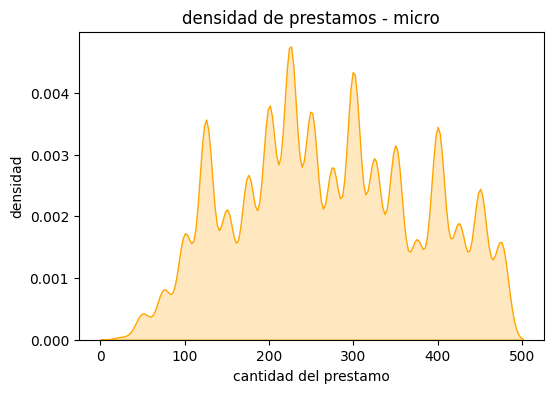

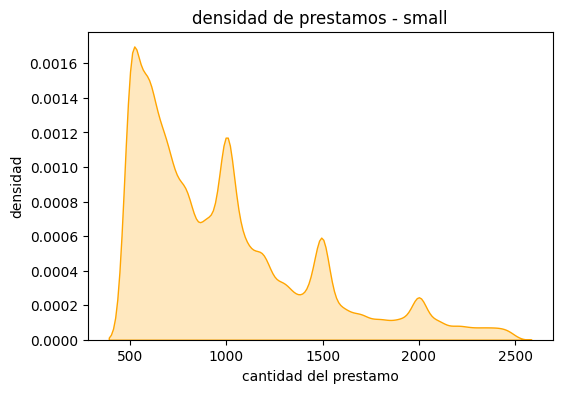

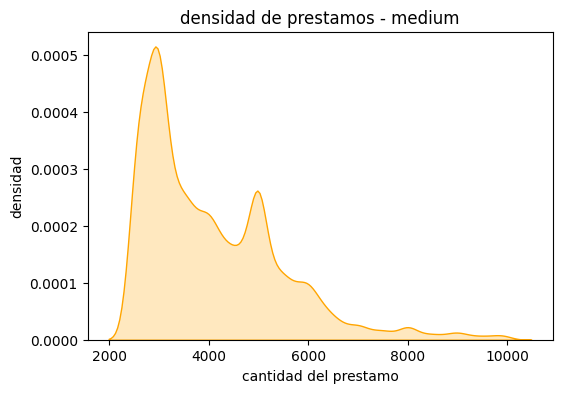

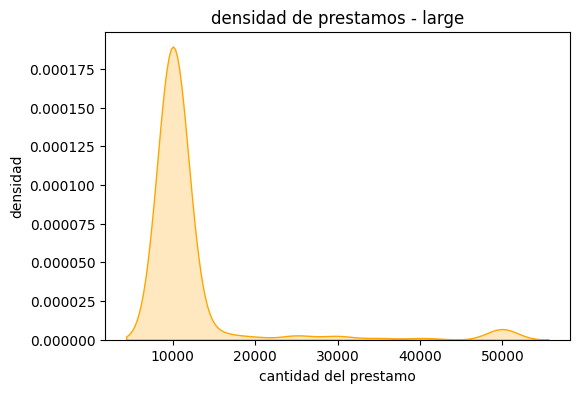

In [59]:
import seaborn as sns

for cat in labels:
  subset=kiva_loans_df[kiva_loans_df['loan_amount_category']==cat]
  plt.figure(figsize=(6,4))
  sns.kdeplot(subset['loan_amount'],fill=True,color='orange')
  plt.title(f"densidad de prestamos - {cat}")
  plt.xlabel("cantidad del prestamo")
  plt.ylabel("densidad")
  plt.show()

In [ ]:
folder="/content/drive/MyDrive/kivaset"
os.makedirst(folder,exist_ok=True)
kiva_loans_df.to_csv(f"{folder}/df_clean.csv",index=False)



In [ ]:
min_val=kiva_loans_df['loan_amount'].min()
max_val=kiva_loans_df['loan_amount'].max()

#definir limites fijos (mismos que usaste para categorizar)

bounds={'micro':(min_val,500),'small':(500,2500),'medium':(2500,10000),'large':(10000,max_val)}

